# ***Bussiness problem definition***

For a telecommunications company it's very important to know which of your customers are about to churn your services. You have to investigate in the preliminary indications for their leaving to try to keep them. so The business problem is to reduce customer churn and increase customer retention.

# ***KPIS that will be imapacted postively***

1. Getting early warning about customers who are going to churn the company services

2. Applying customized plans for the customers who are going to churn the services will lead to higher customers retain rate

# ***About the dataset***

This is a telecommunication customer Dataset.Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

# ***Importing Packages & Libraries***

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score , roc_auc_score , confusion_matrix , accuracy_score , precision_score , recall_score , mutual_info_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# **Importing Data**

In [12]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = data.copy(deep=True)
pd.set_option('max_columns',50)

# ***Data Wrangling***

## ***Assessing data quality***



In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* It looks that many columns datatypes needs to be fixed

In [15]:
columns = ['SeniorCitizen','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [16]:
for column in columns :
  values_count = df[column].value_counts()
  print(f'Unique values for {column} :\n{values_count}')
  print('-'*50)

Unique values for SeniorCitizen :
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
--------------------------------------------------
Unique values for gender :
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------------------------
Unique values for Partner :
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------------------------------------
Unique values for Dependents :
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------------------------------------
Unique values for PhoneService :
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------------------------------------
Unique values for MultipleLines :
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------------------------------------
Unique values for InternetService :
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtyp

* Since the main focus here is to identify the causes for customer's churn then it won't make a difference to know if the customer hasn't subscribe for the dependant service or for the service it self, so the values of columns like StreamingTV , StreamingMovies , MultipleLines , ... etc will be converted to be only [ Yes , No ]

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [20]:
TotalCharges_null_indexes = []
for index,item in enumerate(df['TotalCharges']) :
  try :
    new_item = float(item)
  except :
    TotalCharges_null_indexes.append(index)
    print(f"The index of item with NULL input is : {index}")
print(f"Number of records with NULL values at TotalCharges column is {len(TotalCharges_null_indexes)}")

The index of item with NULL input is : 488
The index of item with NULL input is : 753
The index of item with NULL input is : 936
The index of item with NULL input is : 1082
The index of item with NULL input is : 1340
The index of item with NULL input is : 3331
The index of item with NULL input is : 3826
The index of item with NULL input is : 4380
The index of item with NULL input is : 5218
The index of item with NULL input is : 6670
The index of item with NULL input is : 6754
Number of records with NULL values at TotalCharges column is 11


* Since there's only 11 rows with null values then i'll drop them as their weight is nothing compared to the full data

**Data Issues**

1- SeniorCitizen,Partner,Dependents,PhoneService,PaymentMethod, PaperlessBilling and Churn columns datatype should be converted to bool

2- dropping Null Values in TotalCharges column

3- TotalCharges column datatype should be converted to float

4- Converting services columns into only [ Yes , No ]

## ***Cleaning data***

In [115]:
object_to_bool_columns = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for column in object_to_bool_columns :
  df[column] = df[column].replace({"Yes" : "True" , "No" : "False" })
  # this step to convret the "True" string into real bool
  df[column] = df[column].apply(lambda x : x == 'True' )

In [116]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
# Replacing values in the service columns
df['MultipleLines'] = df['MultipleLines'].replace({"Yes":"True" ,"No" : "False","No phone service":"False"})
# this step to convert the "True" string into real bool
df['MultipleLines'] = df['MultipleLines'].apply(lambda x : x == 'True' )

In [117]:
internet_service_columns = ['OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','TechSupport','StreamingMovies']
for column in internet_service_columns :
  df[column] = df[column].replace({"Yes":"True" ,"No" : "False","No internet service":"False"})
  # this step to convert the "True" string into real bool
  df[column] = df[column].apply(lambda x : x == 'True' )

In [118]:
# Dropping null rows
df = df.drop(TotalCharges_null_indexes)

In [119]:
# convert TotalCharges column datatype into float
df["TotalCharges"] = df["TotalCharges"].astype(float) 

In [120]:
df.drop_duplicates(inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   bool   
 3   Partner           7032 non-null   bool   
 4   Dependents        7032 non-null   bool   
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   bool   
 7   MultipleLines     7032 non-null   bool   
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   bool   
 10  OnlineBackup      7032 non-null   bool   
 11  DeviceProtection  7032 non-null   bool   
 12  TechSupport       7032 non-null   bool   
 13  StreamingTV       7032 non-null   bool   
 14  StreamingMovies   7032 non-null   bool   
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   bool   


* Now after i made sure that all the data types and records are correct, the data is ready to be explored.

# ***Splitting data into training & testing data***



It would be better to split the data before exploring it to prevent getting any knowledge about it's distibution, even unconsciously.

In [122]:
df_train , df_testing = train_test_split(df,random_state=42 , test_size = .1 , shuffle = True)

# ***Exploring data***

## ***Analytics Questions***

* Do customers leave because of a specific bad service they signed up for or it's a common thing with the general customers ?
* Do new customers tend to leave more than the old ones ?
* Is there's any problem with a specific billing method ?
* Is there's any relation between customers churn and their bills or contract type ?
* Do we need to implement family plans for the customers with dependents?
* Are there any correlations between customer demographics (e.g., age, gender, income) and churn rates?
* Can we use machine learning to predict which customers are at highest risk of churning, and if so, which algorithms are most effective?

In [123]:
df_train.describe()

,tenure,MonthlyCharges,TotalCharges
count,6328.000000,6328.000000,6328.000000
mean,32.320322,64.786165,2282.834497
std,24.595728,30.163496,2275.980278
min,1.000000,18.250000,18.800000
25%,9.000000,35.400000,389.512500
50%,29.000000,70.350000,1388.600000
75%,55.000000,89.900000,3801.400000
max,72.000000,118.750000,8684.800000


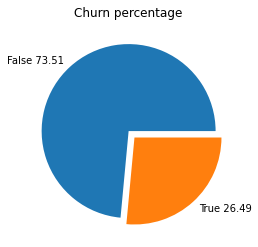

In [187]:
churn_percentage = round(df_train['Churn'].mean() * 100,2)
retain_percentage = round((100 - churn_percentage),2)
plt.pie(df_train['Churn'].value_counts(), labels = [f'False {retain_percentage}' , f'True {churn_percentage}'] , explode = [0,.1])
plt.title("Churn percentage")
plt.show()

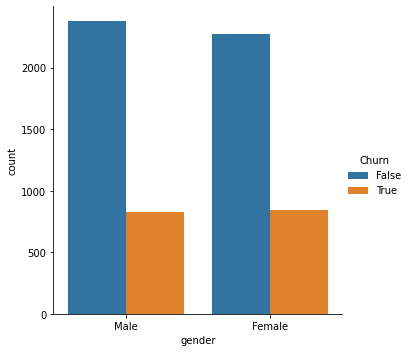

In [126]:
sns.catplot(data=df_train,x='gender',hue="Churn",kind= 'count') ;

* Both genders have similar churn rates

In [127]:
df_train.groupby('SeniorCitizen')['Churn'].mean()

SeniorCitizen
False    0.235250
True     0.418377
Name: Churn, dtype: float64

* Senior citizens have a higher churn rate than the other customers

In [128]:
df_train.groupby('Partner')['Churn'].mean()

Partner
False    0.329985
True     0.194545
Name: Churn, dtype: float64

* Customers with partners have average churn rate less than the other customers

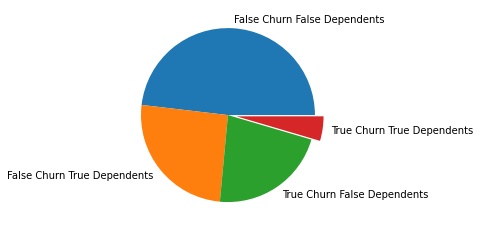

In [129]:
plt.pie(df_train.groupby('Churn')['Dependents'].value_counts(), labels = ["False Churn False Dependents","False Churn True Dependents","True Churn False Dependents","True Churn True Dependents"],
        explode = [0,0,0,.1]) ;

* It's concluded that the existence of dependants doesn't have anything to do with the churn problem

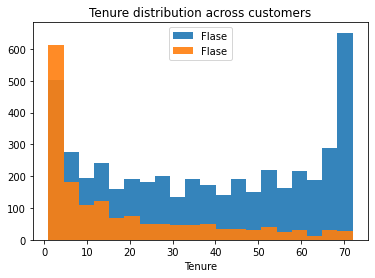

In [130]:
df_train.groupby('Churn')['tenure'].hist(alpha=0.9, bins = 20 , grid = False,label=['Flase','True']) ;
plt.title("Tenure distribution across customers") ;
plt.xlabel("Tenure") ;
plt.legend() ;

* People who churn the company services have average tenure less that the others

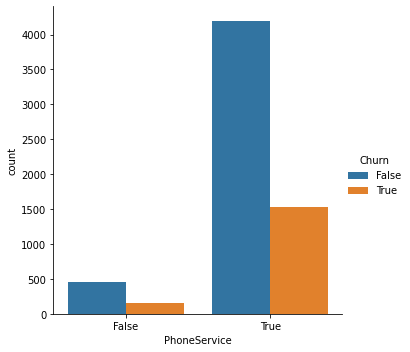

In [131]:
sns.catplot(data=df_train,x='PhoneService',kind='count',hue='Churn') ;

* Nothing suspicious here because normally the PhoneServices subscribers would be the majority and therefore the higher percent of churn customers will come from them.

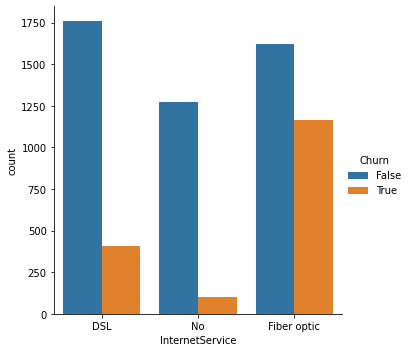

In [132]:
sns.catplot(data=df_train,x='InternetService',kind='count',hue='Churn') ;

* It looks that we might need to investigate more in the fiber optic InternetService.

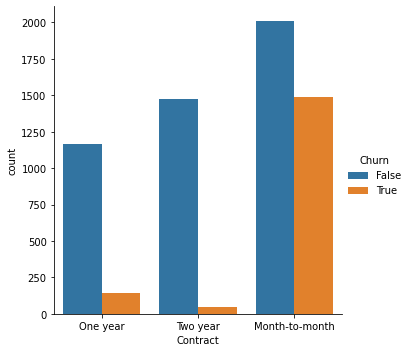

In [133]:
sns.catplot(data=df_train,x='Contract',hue='Churn',kind='count') ;

* As predicted, Customers with Month-to-Month contracts churn the services more that any other contracts type.

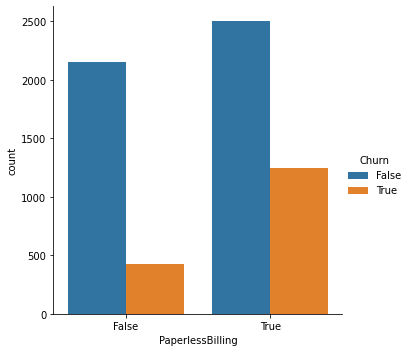

In [134]:
sns.catplot(data=df_train,x='PaperlessBilling',hue="Churn",kind= 'count') ;

* Customers with paperless billing churn services more than others

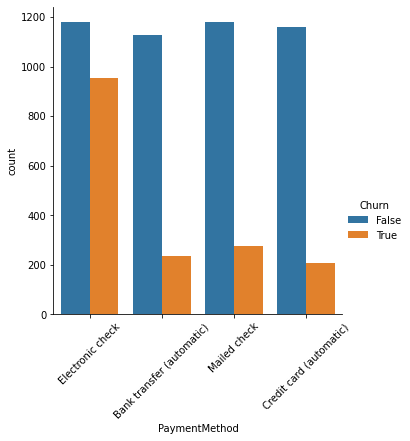

In [135]:
plot = sns.catplot(data=df_train,x='PaymentMethod',hue='Churn',kind='count') ;
plot.set_xticklabels(rotation=45) ;

* It's obvious that the electronic check payment method might have a bad influence on the customers

In [136]:
df_train.groupby('Churn')['TotalCharges'].mean()

Churn
False    2558.424280
True     1517.891975
Name: TotalCharges, dtype: float64

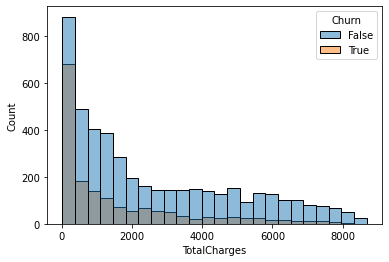

In [137]:
sns.histplot(data = df_train , x = 'TotalCharges' , hue = 'Churn') ;

* Customers who churn the company's services share the same distibution in Total Charges with the rest of customers which points to that they don't leave for financial causes.

# ***Conclusion***

* Gender & Dependants don't have influence on customer's churn.

* Seniorcitezens customers and customers with partners , high tenure and paperless billing are more prone to leave the company.

* Fiber optic InternetService and electronic check payment have a huge bad influence on customers

* Customers with Month-to-Month contracts churn the services more than any other contracts type.







# ***Feature Engineering - Data Preprocessing***

In [138]:
def encode_nominal_variable(dataframe,column_name) :
  one_hot_encoded = pd.get_dummies(dataframe[column_name],prefix=column_name)
  dataframe = pd.concat([dataframe,one_hot_encoded],axis=1)
  dataframe.drop([column_name],axis=1,inplace=True)
  return dataframe

In [139]:
def encode_bool_variable(dataframe,column_name) :
  dataframe[column_name] = dataframe[column_name].astype(int)
  return dataframe

In [140]:
def preprocess_data(data) :

  data.drop(['customerID'], axis=1,inplace = True)

  # ont-hot-encoding for the categorical columns
  nominal_variable = ['gender' , 'InternetService' , 'Contract' , 'PaymentMethod']
  for column in nominal_variable :
    data = encode_nominal_variable(data,column)


  #encoding boolean columns into numerical ones
  bool_columns = ['SeniorCitizen' , 'Partner' , 'Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV',
                'StreamingMovies','PaperlessBilling','Churn']
  for column in bool_columns :
    data = encode_bool_variable(data,column)


  # standarizing numerical columns
  float_columns = ['tenure','MonthlyCharges','TotalCharges']
  scaler = MinMaxScaler()
  data[float_columns] = scaler.fit_transform(data[float_columns])

  # Splitting data into features and target sets 
  y = data["Churn"]
  x = data.drop(['Churn'],axis=1)

  return x,y

# ***Splitting data into training and cross-validation sets***

In [141]:
# splitting data into training & validation sets so we can validate our model on a data it hasn't seen before.
x,y = preprocess_data(df_train)
x_train,x_validation,  y_train , y_validation = train_test_split(x,y,random_state=42,test_size=.1)

# ***Shortlisting Promising model***


*Since the main concern is to predict if the customer is going to churn the company services or not, then my biggest interest here would be the recall score. I won't give much weight to the false positives-(Better safe than sorry).*

In [142]:
# defining function to train the provided model and test it on the validation data and return the recall score
def get_metrics(model,training_data,training_target,validation_data,validation_target) :
  model.fit(training_data,training_target)
  y_pred = model.predict(validation_data)
  recall = recall_score(y_pred=y_pred,y_true=validation_target)
  return  recall

## ***Logistic Regression***

In [143]:
logistic_regression_model = LogisticRegression(random_state=42)

# using the predefined function to return the recall score of the logistic regression model
logistic_recall = get_metrics(logistic_regression_model,x_train,y_train,x_validation,y_validation)

In [144]:
print(f"Logistic Regression recall : {logistic_recall}")

Logistic Regression recall : 0.5195530726256983


## ***Decision Tree***

In [145]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

# using the predefined function to return the recall score of the Decision tree model
decision_tree_recall  = get_metrics(decision_tree_model,x_train,y_train,x_validation,y_validation)

In [146]:
print(f"Decision Tree recall : {decision_tree_recall}")

Decision Tree recall : 0.4748603351955307


## ***SVC***

In [147]:
svc_model = SVC(random_state=21) ;

# using the predefined function to return the recall score of the SVC model
svc_recall  = get_metrics(svc_model,x_train,y_train,x_validation,y_validation)

In [148]:
print(f"SVC recall : {svc_recall}")

SVC recall : 0.49162011173184356


## ***K Nearest Neighbors***

In [149]:
knn_model = KNeighborsClassifier()

# using the predefined function to return the recall score of the K Nearest Neighbors model
knn_recall  = get_metrics(knn_model,x_train,y_train,x_validation,y_validation)

In [150]:
print(f"KNN recall : {knn_recall}")

KNN recall : 0.48044692737430167


## ***Gradient Boosting***

In [151]:
gb_model = GradientBoostingClassifier(random_state = 42)

# using the predefined function to return the recall score of the Gradient Boosting model
gb_recall = get_metrics(gb_model,x_train,y_train,x_validation,y_validation)

In [152]:
print(f"Gradient Boosting recall : {gb_recall}")

Gradient Boosting recall : 0.5027932960893855


## ***Random Forest***

In [153]:
rf_model = RandomForestClassifier(random_state = 42)

# using the predefined function to return the recall score of the Random Forest model
rf_recall = get_metrics(rf_model,x_train,y_train,x_validation,y_validation)

In [154]:
print(f"Random Forest recall : {rf_recall}")

Random Forest recall : 0.44692737430167595


*Now after i evaluated several models with the default hyperparameters i'll choose just one to fine tune it's hyperparameters in order to get better results, since the Logistic Regression model got the best score i'll choose to go further with it*

# ***Model's hyperparameter tuning***

**Logistic Regression model Hyperparametes :**

1. penalty: Regularization parameter   
2. solver : Algorithm to use in the optimization problem
3. C: Inverse of regularization strength




In [155]:
# defining a parameter grid to be used with gridsearch
pararm_grid = {"penalty" : ["l1","l2","elasticnet"] , "solver" : ["lbfgs", "liblinear", "sag"] , 'C': [0.001, 0.01, 0.1, 1, 10] }

In [ ]:
logistic_regression_model = LogisticRegression()

# Applying GridSearchCV method for tuning the model's hyperparameters
score = make_scorer(recall_score)
grid_search = GridSearchCV(logistic_regression_model,pararm_grid,scoring=score,cv=5)
grid_search.fit(x_train,y_train)

In [157]:
print("Best Estimator : {}".format(grid_search.best_estimator_))
print("Best Score : {}".format(grid_search.best_score_))
print("Best Parameters : {}".format(grid_search.best_params_))

Best Estimator : LogisticRegression(C=10, penalty='l1', solver='liblinear')
Best Score : 0.5511215161649945
Best Parameters : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [158]:
# evaluating the model with the best parameters on the validation set
logistic_regression_model = grid_search.best_estimator_
logistic_regression_model.fit(x_train,y_train)
y_pred = logistic_regression_model.predict(x_validation)
recall = recall_score(y_pred=y_pred,y_true=y_validation)
print(f"Recall : {recall}")

Recall 0.5251396648044693


*After fine tuning the hyperparameters with the grid search, the recall increased only by .01, So now i'l find a better way to get a higher recall score*

## ***1- Oversampling***



In [159]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [ ]:
logistic_regression_model = LogisticRegression()

# Applying GridSearchCV method for tuning the model's hyperparameters
score = make_scorer(recall_score)
grid_search = GridSearchCV(logistic_regression_model,pararm_grid,scoring=score,cv=5)
grid_search.fit(x_train_smote,y_train_smote)

In [161]:
print("Best Estimator : {}".format(grid_search.best_estimator_))
print("Best Score : {}".format(grid_search.best_score_))
print("Best Parameters : {}".format(grid_search.best_params_))

Best Estimator : LogisticRegression(C=10)
Best Score : 0.8299131619274647
Best Parameters : {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# evaluating the model with the best parameters on the validation set
logistic_regression_model = grid_search.best_estimator_
logistic_regression_model.fit(x_train_smote,y_train_smote)
y_pred = logistic_regression_model.predict(x_validation)
recall = recall_score(y_pred=y_pred,y_true=y_validation)

In [163]:
print(f"Recall {recall}")

Recall 0.6703910614525139


*Validation Score = .67*

*Training score = .82*

*It's obvious that the model overfitted the data and resulted in a significant lower recall score for the validation data so i'll try the undersampling technique*

## ***2- UnderSampling***

In [164]:
undersample = RandomUnderSampler(random_state=42)
x_train_undersample, y_train_undersample = undersample.fit_resample(x_train, y_train)

In [ ]:
logistic_regression_model = LogisticRegression()

# Applying GridSearchCV method for tuning the model's hyperparameters
score = make_scorer(recall_score)
grid_search = GridSearchCV(logistic_regression_model,pararm_grid,scoring=score,cv=5)
grid_search.fit(x_train_undersample,y_train_undersample)

In [166]:
print("Best Estimator : {}".format(grid_search.best_estimator_))
print("Best Score : {}".format(grid_search.best_score_))
print("Best Parameters : {}".format(grid_search.best_params_))

Best Estimator : LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
Best Score : 0.8717480490523968
Best Parameters : {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [167]:
# evaluating the model with the best parameters on the validation set
logistic_regression_model = grid_search.best_estimator_
logistic_regression_model.fit(x_train_undersample,y_train_undersample)
y_pred = logistic_regression_model.predict(x_validation)
recall = recall_score(y_pred=y_pred,y_true=y_validation)

In [168]:
print(f"Recall {recall}")

Recall 0.8100558659217877


In [169]:
print(f"Training data shape after performing Undersampling{x_train_undersample.shape}")

Training data shape after performing Undersampling(2994, 27)


*Despite getting better results with using undersampling but the size of the training data is cutted into nearly half the original size which is one of the biggest disadvantages for the undersampling technique*

***Now after i fine tuned the hyperparameters of the model and applied undersampling on the training data, it's time to check the model performance on a data that it hasn't seen before aka testing data***

# ***Testing the model's performance :***

In [170]:
# Using the predefined preprocessing function to preprocess the testing dataset
x_test,y_test = preprocess_data(df_testing)

In [171]:
# Evaluating the final model on the testing dataset using several metrics
y_pred = logistic_regression_model.predict(x_test)
accuracy = accuracy_score(y_pred=y_pred,y_true=y_test)
recall = recall_score(y_pred=y_pred,y_true=y_test)
precision =  precision_score(y_pred=y_pred,y_true=y_test)
f1_score = f1_score(y_pred=y_pred,y_true=y_test)

In [172]:
print("Model's performance for several metrics : ")
print(f"Recall :  {recall}")
print(f"Accuracy :  {accuracy}")
print(f"Precision :  {precision}")
print(f"F1 Score :  {f1_score}")

Model's performance for several metrics : 
Recall :  0.8341968911917098
Accuracy :  0.7159090909090909
Precision :  0.48936170212765956
F1 Score :  0.6168582375478927


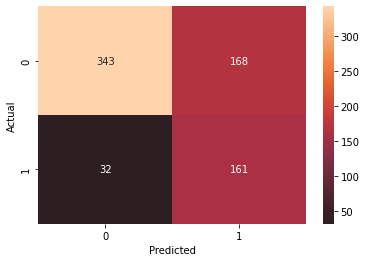

In [173]:
# Displaying heatmap to show the confusion matrix of the testing dataset
ax = sns.heatmap(confusion_matrix(y_true=y_test,y_pred=y_pred),center=True,annot=True, fmt=".0f") ;
ax.set(xlabel="Predicted", ylabel="Actual")
plt.show()